In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
import pyproj
import utm
import pandas as pd 
import traceback 
from pathlib import Path  
import os  
import numpy.ma as ma
import netCDF4 as nc
import glob
import datetime as dt
from netCDF4 import date2num,num2date
#from scipy.ndimage import gaussian_filter

C:\Users\Anna\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
#March 25 Dopplerscat
#ds25_1 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0036-0111_line01.L2.nc')
ds25_2 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0119-0174_line02.L2.nc')
ds25_3 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0189-0236_line03.L2.nc')
ds25_4 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0249-0312_line04.L2.nc')
ds25_5 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0326-0368_line05.L2.nc')
ds25_6 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0380-0436_line06.L2.nc')
ds25_7 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0450-0490_line07.L2.nc')
ds25_8 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0504-0552_line08.L2.nc')
ds25_9 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0565-0602_line09.L2.nc')
#ds25_10 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0609-0696_line10.L2.nc')

#Open HYCOM 25
ds_25 = xr.open_mfdataset('/Users/Anna/Desktop/MSMET/Thesis/WRFprepData/March2018HYCOM/020_archv.2018_084_*_3z.nc', combine = 'by_coords', concat_dim = 'time')
ds_25.to_netcdf('test_25.nc')
ds25 = xr.open_dataset('test_25.nc')

C:\Users\Anna\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


C:\Users\Anna\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


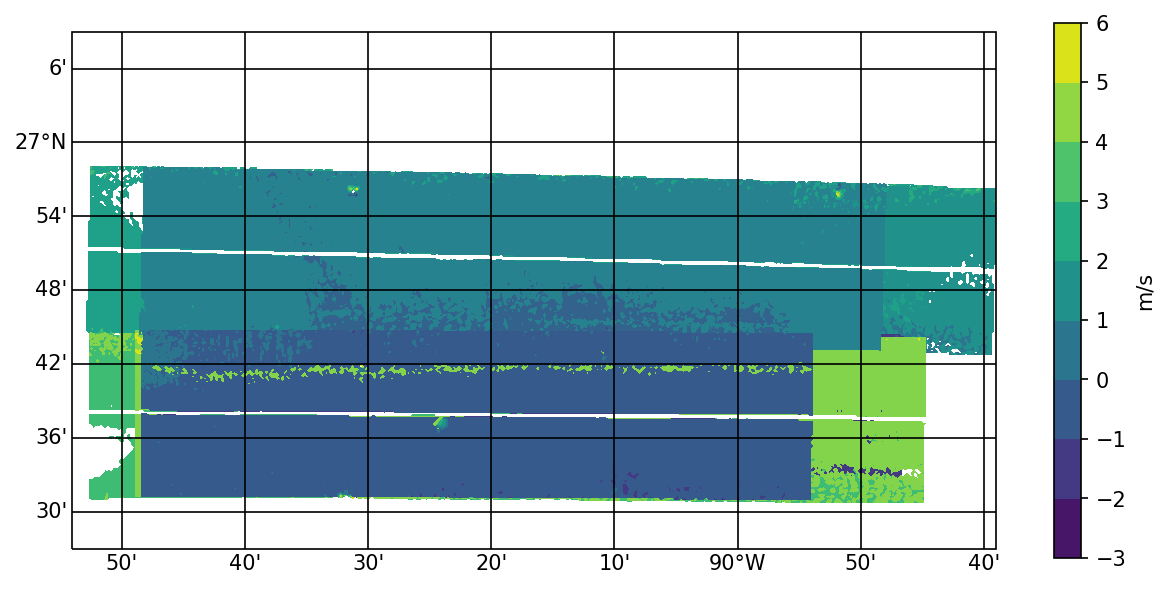

In [3]:
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.u_current.values)
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, ds25_2.u_current.values)
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, ds25_3.u_current.values)
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, ds25_4.u_current.values)
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, ds25_5.u_current.values)
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, ds25_6.u_current.values)
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, ds25_7.u_current.values)
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, ds25_8.u_current.values)
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, ds25_9.u_current.values)
#cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, ds25_10.u_current.values)
#cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, ds26_11.u_current.values)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.show()

In [3]:
#test domain
#latbounds = [26.5, 27]
#lonbounds = [-91, -90.5]

#real domain 
latbounds = [24.5, 29]
lonbounds = [-93, -87.5]

lats = ds25.Latitude.values[:]
lons = ds25.Longitude.values[:]

#set upper & lower bounds
latli = np.argmin(np.abs(lats-latbounds[0]))
latui = np.argmin(np.abs(lats-latbounds[1]))
lonli = np.argmin(np.abs(lons-lonbounds[0]))
lonui = np.argmin(np.abs(lons-lonbounds[1]))

lat_array=ds25.Latitude.values[latli:latui]
lon_array=ds25.Longitude.values[lonli:lonui]


In [4]:

#convert DS to u and v components 
#wind components 
#speed25_1 = ds25_1.wind_speed.values
#dir25_1 = ds25_1.wind_dir.values
speed25_2 = ds25_2.wind_speed.values
dir25_2 = ds25_2.wind_dir.values
speed25_3 = ds25_3.wind_speed.values
dir25_3 = ds25_3.wind_dir.values
speed25_4 = ds25_4.wind_speed.values
dir25_4 = ds25_4.wind_dir.values
speed25_5 = ds25_5.wind_speed.values
dir25_5 = ds25_5.wind_dir.values
speed25_6 = ds25_6.wind_speed.values
dir25_6 = ds25_6.wind_dir.values
speed25_7 = ds25_7.wind_speed.values
dir25_7 = ds25_7.wind_dir.values
speed25_8 = ds25_8.wind_speed.values
dir25_8 = ds25_8.wind_dir.values
speed25_9 = ds25_9.wind_speed.values
dir25_9 = ds25_9.wind_dir.values
#speed25_10 = ds25_10.wind_speed.values
#dir25_10 = ds25_10.wind_dir.values

#convert to math degrees
#dir_math25_1=90-dir25_1*(np.pi/180)
dir_math25_2=90-dir25_2*(np.pi/180)
dir_math25_3=90-dir25_3*(np.pi/180)
dir_math25_4=90-dir25_4*(np.pi/180)
dir_math25_5=90-dir25_5*(np.pi/180)
dir_math25_6=90-dir25_6*(np.pi/180)
dir_math25_7=90-dir25_7*(np.pi/180)
dir_math25_8=90-dir25_8*(np.pi/180)
dir_math25_9=90-dir25_9*(np.pi/180)
#dir_math25_10=90-dir25_10*(np.pi/180)

#get uv wind components
#components 
#uWind25_1=speed25_1*np.cos(dir_math25_1*(180/np.pi))
#vWind25_1=speed25_1*np.sin(dir_math25_1*(180/np.pi))
uWind25_2=speed25_2*np.cos(dir_math25_2*(180/np.pi))
vWind25_2=speed25_2*np.sin(dir_math25_2*(180/np.pi))
uWind25_3=speed25_3*np.cos(dir_math25_3*(180/np.pi))
vWind25_3=speed25_3*np.sin(dir_math25_3*(180/np.pi))
uWind25_4=speed25_4*np.cos(dir_math25_4*(180/np.pi))
vWind25_4=speed25_4*np.sin(dir_math25_4*(180/np.pi))
uWind25_5=speed25_5*np.cos(dir_math25_5*(180/np.pi))
vWind25_5=speed25_5*np.sin(dir_math25_5*(180/np.pi))
uWind25_6=speed25_6*np.cos(dir_math25_6*(180/np.pi))
vWind25_6=speed25_6*np.sin(dir_math25_6*(180/np.pi))
uWind25_7=speed25_7*np.cos(dir_math25_7*(180/np.pi))
vWind25_7=speed25_7*np.sin(dir_math25_7*(180/np.pi))
uWind25_8=speed25_8*np.cos(dir_math25_8*(180/np.pi))
vWind25_8=speed25_8*np.sin(dir_math25_8*(180/np.pi))
uWind25_9=speed25_9*np.cos(dir_math25_9*(180/np.pi))
vWind25_9=speed25_9*np.sin(dir_math25_9*(180/np.pi))
#uWind25_10=speed25_10*np.cos(dir_math25_10*(180/np.pi))
#vWind25_10=speed25_10*np.sin(dir_math25_10*(180/np.pi))

#set other DS variables 
#lat25_1=ds25_1.latitude.values
#lon25_1=ds25_1.longitude.values
#flag25_1=ds25_1.flag.values
#u_cur25_1=ds25_1.u_current.values
#v_cur25_1=ds25_1.v_current.values
#x25_1=ds25_1.x.values
#y25_1=ds25_1.y.values

lat25_2=ds25_2.latitude.values
lon25_2=ds25_2.longitude.values
flag25_2=ds25_2.flag.values
u_cur25_2=ds25_2.u_current.values
v_cur25_2=ds25_2.v_current.values

lat25_3=ds25_3.latitude.values
lon25_3=ds25_3.longitude.values
flag25_3=ds25_3.flag.values
u_cur25_3=ds25_3.u_current.values
v_cur25_3=ds25_3.v_current.values

lat25_4=ds25_4.latitude.values
lon25_4=ds25_4.longitude.values
flag25_4=ds25_4.flag.values
u_cur25_4=ds25_4.u_current.values
v_cur25_4=ds25_4.v_current.values

lat25_5=ds25_5.latitude.values
lon25_5=ds25_5.longitude.values
flag25_5=ds25_5.flag.values
u_cur25_5=ds25_5.u_current.values
v_cur25_5=ds25_5.v_current.values

lat25_6=ds25_6.latitude.values
lon25_6=ds25_6.longitude.values
flag25_6=ds25_6.flag.values
u_cur25_6=ds25_6.u_current.values
v_cur25_6=ds25_6.v_current.values

lat25_7=ds25_7.latitude.values
lon25_7=ds25_7.longitude.values
flag25_7=ds25_7.flag.values
u_cur25_7=ds25_7.u_current.values
v_cur25_7=ds25_7.v_current.values

lat25_8=ds25_8.latitude.values
lon25_8=ds25_8.longitude.values
flag25_8=ds25_8.flag.values
u_cur25_8=ds25_8.u_current.values
v_cur25_8=ds25_8.v_current.values

lat25_9=ds25_9.latitude.values
lon25_9=ds25_9.longitude.values
flag25_9=ds25_9.flag.values
u_cur25_9=ds25_9.u_current.values
v_cur25_9=ds25_9.v_current.values

#lat25_10=ds25_10.latitude.values
#lon25_10=ds25_10.longitude.values
#flag25_10=ds25_10.flag.values
#u_cur25_10=ds25_10.u_current.values
#v_cur25_10=ds25_10.v_current.values

In [5]:
#Apply Error Flag 
#0 is good, 2 is bad
#set flag to only accept 0

#lonlen25_1=len(lon25_1) #236
#latlen25_1=len(lat25_1) #954
#goodWindUarr25_1=np.zeros((latlen25_1,lonlen25_1))
#goodWindUarr25_1[:]=np.nan
#goodWindVarr25_1=np.zeros((latlen25_1,lonlen25_1))
#goodWindVarr25_1[:]=np.nan
#for x in range (len(lon25_1)):
#    for y in range (len(lat25_1)):
#        if flag25_1[y,x] == 0:
#            goodWindUarr25_1[y,x] = uWind25_1[y,x] 
#            goodWindVarr25_1[y,x] = vWind25_1[y,x] 
           
lonlen25_2=len(lon25_2)
latlen25_2=len(lat25_2)
goodWindUarr25_2=np.zeros((latlen25_2,lonlen25_2))
goodWindUarr25_2[:]=np.nan
goodWindVarr25_2=np.zeros((latlen25_2,lonlen25_2))
goodWindVarr25_2[:]=np.nan
for x in range (len(lon25_2)):
    for y in range (len(lat25_2)):
        if flag25_2[y,x] == 0:
            goodWindUarr25_2[y,x] = uWind25_2[y,x] 
            goodWindVarr25_2[y,x] = vWind25_2[y,x]
            
lonlen25_3=len(lon25_3)
latlen25_3=len(lat25_3)
goodUarr25_3=np.zeros((latlen25_3,lonlen25_3))
goodWindUarr25_3=np.zeros((latlen25_3,lonlen25_3))
goodWindUarr25_3[:]=np.nan
goodWindVarr25_3=np.zeros((latlen25_3,lonlen25_3))
goodWindVarr25_3[:]=np.nan
for x in range (len(lon25_3)):
    for y in range (len(lat25_3)):
        if flag25_3[y,x] == 0:
            goodWindUarr25_3[y,x] = uWind25_3[y,x] 
            goodWindVarr25_3[y,x] = vWind25_3[y,x] 
            
lonlen25_4=len(lon25_4)
latlen25_4=len(lat25_4)
goodWindUarr25_4=np.zeros((latlen25_4,lonlen25_4))
goodWindUarr25_4[:]=np.nan
goodWindVarr25_4=np.zeros((latlen25_4,lonlen25_4))
goodWindVarr25_4[:]=np.nan
for x in range (len(lon25_4)):
    for y in range (len(lat25_4)):
        if flag25_4[y,x] == 0:
            goodWindUarr25_4[y,x] = uWind25_4[y,x] 
            goodWindVarr25_4[y,x] = vWind25_4[y,x] 
            
lonlen25_5=len(lon25_5)
latlen25_5=len(lat25_5)
goodWindUarr25_5=np.zeros((latlen25_5,lonlen25_5))
goodWindUarr25_5[:]=np.nan
goodWindVarr25_5=np.zeros((latlen25_5,lonlen25_5))
goodWindVarr25_5[:]=np.nan
for x in range (len(lon25_5)):
    for y in range (len(lat25_5)):
        if flag25_5[y,x] == 0:
            goodWindUarr25_5[y,x] = uWind25_5[y,x] 
            goodWindVarr25_5[y,x] = vWind25_5[y,x]
            
lonlen25_6=len(lon25_6)
latlen25_6=len(lat25_6)
goodWindUarr25_6=np.zeros((latlen25_6,lonlen25_6))
goodWindUarr25_6[:]=np.nan
goodWindVarr25_6=np.zeros((latlen25_6,lonlen25_6))
goodWindVarr25_6[:]=np.nan
for x in range (len(lon25_6)):
    for y in range (len(lat25_6)):
        if flag25_6[y,x] == 0:
            goodWindUarr25_6[y,x] = uWind25_6[y,x] 
            goodWindVarr25_6[y,x] = vWind25_6[y,x]
            
lonlen25_7=len(lon25_7)
latlen25_7=len(lat25_7)
goodWindUarr25_7=np.zeros((latlen25_7,lonlen25_7))
goodWindUarr25_7[:]=np.nan
goodWindVarr25_7=np.zeros((latlen25_7,lonlen25_7))
goodWindVarr25_7[:]=np.nan
for x in range (len(lon25_7)):
    for y in range (len(lat25_7)):
        if flag25_7[y,x] == 0:
            goodWindUarr25_7[y,x] = uWind25_7[y,x] 
            goodWindVarr25_7[y,x] = vWind25_7[y,x]
            
lonlen25_8=len(lon25_8)
latlen25_8=len(lat25_8)
goodWindUarr25_8=np.zeros((latlen25_8,lonlen25_8))
goodWindUarr25_8[:]=np.nan
goodWindVarr25_8=np.zeros((latlen25_8,lonlen25_8))
goodWindVarr25_8[:]=np.nan
for x in range (len(lon25_8)):
    for y in range (len(lat25_8)):
        if flag25_8[y,x] == 0:
            goodWindUarr25_8[y,x] = uWind25_8[y,x] 
            goodWindVarr25_8[y,x] = vWind25_8[y,x]
            
lonlen25_9=len(lon25_9)
latlen25_9=len(lat25_9)
goodWindUarr25_9=np.zeros((latlen25_9,lonlen25_9))
goodWindUarr25_9[:]=np.nan
goodWindVarr25_9=np.zeros((latlen25_9,lonlen25_9))
goodWindVarr25_9[:]=np.nan
for x in range (len(lon25_9)):
    for y in range (len(lat25_9)):
        if flag25_9[y,x] == 0:
            goodWindUarr25_9[y,x] = uWind25_9[y,x] 
            goodWindVarr25_9[y,x] = vWind25_9[y,x]
            
#lonlen25_10=len(lon25_10)
#latlen25_10=len(lat25_10)
#goodWindUarr25_10=np.zeros((latlen25_10,lonlen25_10))
#goodWindUarr25_10[:]=np.nan
#goodWindVarr25_10=np.zeros((latlen25_10,lonlen25_10))
#goodWindVarr25_10[:]=np.nan
#for x in range (len(lon25_10)):
#    for y in range (len(lat25_10)):
#        if flag25_10[y,x] == 0:
#            goodWindUarr25_10[y,x] = uWind25_10[y,x] 
#            goodWindVarr25_10[y,x] = vWind25_10[y,x]
        


In [13]:
#Gaussian Filter U25 WIND

#REAL CASE: 
#lat_0 =  24.5
#lon_0 = -93
#lat_max = 28.75
#lon_max = -87.5

#TEST CASE mini
lat_0 =  26.5
lon_0 = -90.75
lat_max = 27
lon_max = -89.75 

#min, max, then increment and fill lat & then lon (Y=lat, X=lon)
#0.008 degrees = 1km 
WRF_lat = np.arange(lat_0, lat_max, 0.00898315)
WRF_lon = np.arange(lon_0, lon_max, 0.00898315)
WRF_latLen = len(WRF_lat)
WRF_lonLen = len(WRF_lon)

#make current arrays (u & v) that match lat & lon dimensions, fill with nans 
uWind25_WRF  = np.zeros((WRF_latLen, WRF_lonLen))  
uWind25_WRF[:] = -999

#at equator, 1deg = 111.31949077920639km, so 1km*(1deg/111.31949077920639km) = 0.00898315
#Great Circle Calculator 
#http://edwilliams.org/gccalc.htm

#DS sigma??? = 0.03 # 0.015*2   
km_per_deg= 1/0.00898315
sigma_HYCOM = 0.02 # 0.015*2 #For HYCOM 
sigma_HYCOM_km = sigma_HYCOM*km_per_deg
#sigma_DS = 0.75 #0.5-1.0 
sigma_DS = 0.75 #0.5-1.0 
sigma_DS_km = sigma_DS*km_per_deg

for y in range (0, WRF_latLen):  
    for x in range (0, WRF_lonLen):
        sum_product_uWind25HYCOM = 0
        #sum_weight_DS25uWind1 = 0
        #sum_product_uWind25DS1 = 0
        sum_weight_DS25uWind2 = 0
        sum_product_uWind25DS2 = 0
        sum_weight_DS25uWind3 = 0
        sum_product_uWind25DS3 = 0
        sum_weight_DS25uWind4 = 0
        sum_product_uWind25DS4 = 0
        sum_weight_DS25uWind5 = 0
        sum_product_uWind25DS5 = 0
        sum_weight_DS25uWind6 = 0
        sum_product_uWind25DS6 = 0
        sum_weight_DS25uWind7 = 0
        sum_product_uWind25DS7 = 0
        sum_weight_DS25uWind8 = 0
        sum_product_uWind25DS8 = 0
        sum_weight_DS25uWind9 = 0
        sum_product_uWind25DS9 = 0
        #sum_weight_DS25uWind10 = 0
        #sum_product_uWind25DS10 = 0

        #define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)
        #+- half size 
        #set bounds in lat/lon
        min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, WRF_lon[0])
        max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, WRF_lat[0])   
        max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1])     

        #DS lat/lon comparison
        #DS25uWind1_test1_In = np.where(lon25_1 >= min_lon)
        #DS25uWind1_test2_In = np.where(lon25_1 <= max_lon)
        #DS25uWind1_inter_like_lon = np.intersect1d(DS25uWind1_test1_In, DS25uWind1_test2_In)
        #DS25uWind1_test1_In = np.where(lat25_1 >= min_lat)
        #DS25uWind1_test2_In = np.where(lat25_1 <= max_lat)
        #DS25uWind1_inter_like_lat = np.intersect1d(DS25uWind1_test1_In, DS25uWind1_test2_In)         
        
        DS25uWind2_test1_In = np.where(lon25_2 >= min_lon)
        DS25uWind2_test2_In = np.where(lon25_2 <= max_lon)
        DS25uWind2_inter_like_lon = np.intersect1d(DS25uWind2_test1_In, DS25uWind2_test2_In)
        DS25uWind2_test1_In = np.where(lat25_2 >= min_lat)
        DS25uWind2_test2_In = np.where(lat25_2 <= max_lat)
        DS25uWind2_inter_like_lat = np.intersect1d(DS25uWind2_test1_In, DS25uWind2_test2_In) 
        
        DS25uWind3_test1_In = np.where(lon25_3 >= min_lon)
        DS25uWind3_test2_In = np.where(lon25_3 <= max_lon)
        DS25uWind3_inter_like_lon = np.intersect1d(DS25uWind3_test1_In, DS25uWind3_test2_In)
        DS25uWind3_test1_In = np.where(lat25_3 >= min_lat)
        DS25uWind3_test2_In = np.where(lat25_3 <= max_lat)
        DS25uWind3_inter_like_lat = np.intersect1d(DS25uWind3_test1_In, DS25uWind3_test2_In) 
        
        DS25uWind4_test1_In = np.where(lon25_4 >= min_lon)
        DS25uWind4_test2_In = np.where(lon25_4 <= max_lon)
        DS25uWind4_inter_like_lon = np.intersect1d(DS25uWind4_test1_In, DS25uWind4_test2_In)
        DS25uWind4_test1_In = np.where(lat25_4 >= min_lat)
        DS25uWind4_test2_In = np.where(lat25_4 <= max_lat)
        DS25uWind4_inter_like_lat = np.intersect1d(DS25uWind4_test1_In, DS25uWind4_test2_In)         
        
        DS25uWind5_test1_In = np.where(lon25_5 >= min_lon)
        DS25uWind5_test2_In = np.where(lon25_5 <= max_lon)
        DS25uWind5_inter_like_lon = np.intersect1d(DS25uWind5_test1_In, DS25uWind5_test2_In)
        DS25uWind5_test1_In = np.where(lat25_5 >= min_lat)
        DS25uWind5_test2_In = np.where(lat25_5 <= max_lat)
        DS25uWind5_inter_like_lat = np.intersect1d(DS25uWind5_test1_In, DS25uWind5_test2_In) 
        
        DS25uWind6_test1_In = np.where(lon25_6 >= min_lon)
        DS25uWind6_test2_In = np.where(lon25_6 <= max_lon)
        DS25uWind6_inter_like_lon = np.intersect1d(DS25uWind6_test1_In, DS25uWind6_test2_In)
        DS25uWind6_test1_In = np.where(lat25_6 >= min_lat)
        DS25uWind6_test2_In = np.where(lat25_6 <= max_lat)
        DS25uWind6_inter_like_lat = np.intersect1d(DS25uWind6_test1_In, DS25uWind6_test2_In) 

        DS25uWind7_test1_In = np.where(lon25_7 >= min_lon)
        DS25uWind7_test2_In = np.where(lon25_7 <= max_lon)
        DS25uWind7_inter_like_lon = np.intersect1d(DS25uWind7_test1_In, DS25uWind7_test2_In)
        DS25uWind7_test1_In = np.where(lat25_7 >= min_lat)
        DS25uWind7_test2_In = np.where(lat25_7 <= max_lat)
        DS25uWind7_inter_like_lat = np.intersect1d(DS25uWind7_test1_In, DS25uWind7_test2_In)
    
        DS25uWind8_test1_In = np.where(lon25_8 >= min_lon)
        DS25uWind8_test2_In = np.where(lon25_8 <= max_lon)
        DS25uWind8_inter_like_lon = np.intersect1d(DS25uWind8_test1_In, DS25uWind8_test2_In)
        DS25uWind8_test1_In = np.where(lat25_8 >= min_lat)
        DS25uWind8_test2_In = np.where(lat25_8 <= max_lat)
        DS25uWind8_inter_like_lat = np.intersect1d(DS25uWind8_test1_In, DS25uWind8_test2_In) 
        
        DS25uWind9_test1_In = np.where(lon25_9 >= min_lon)
        DS25uWind9_test2_In = np.where(lon25_9 <= max_lon)
        DS25uWind9_inter_like_lon = np.intersect1d(DS25uWind9_test1_In, DS25uWind9_test2_In)
        DS25uWind9_test1_In = np.where(lat25_9 >= min_lat)
        DS25uWind9_test2_In = np.where(lat25_9 <= max_lat)
        DS25uWind9_inter_like_lat = np.intersect1d(DS25uWind9_test1_In, DS25uWind9_test2_In) 
        
        #DS25uWind10_test1_In = np.where(lon25_10 >= min_lon)
        #DS25uWind10_test2_In = np.where(lon25_10 <= max_lon)
        #DS25uWind10_inter_like_lon = np.intersect1d(DS25uWind10_test1_In, DS25uWind10_test2_In)
        #DS25uWind10_test1_In = np.where(lat25_10 >= min_lat)
        #DS25uWind10_test2_In = np.where(lat25_10 <= max_lat)
        #DS25uWind10_inter_like_lat = np.intersect1d(DS25uWind10_test1_In, DS25uWind10_test2_In) 

        
        #DS index
        #DS25uWind1_lon_indices =  DS25uWind1_inter_like_lon
        #DS25uWind1_lat_indices =  DS25uWind1_inter_like_lat
        DS25uWind2_lon_indices =  DS25uWind2_inter_like_lon
        DS25uWind2_lat_indices =  DS25uWind2_inter_like_lat
        DS25uWind3_lon_indices =  DS25uWind3_inter_like_lon
        DS25uWind3_lat_indices =  DS25uWind3_inter_like_lat
        DS25uWind4_lon_indices =  DS25uWind4_inter_like_lon
        DS25uWind4_lat_indices =  DS25uWind4_inter_like_lat        
        DS25uWind5_lon_indices =  DS25uWind5_inter_like_lon
        DS25uWind5_lat_indices =  DS25uWind5_inter_like_lat
        DS25uWind6_lon_indices =  DS25uWind6_inter_like_lon
        DS25uWind6_lat_indices =  DS25uWind6_inter_like_lat
        DS25uWind7_lon_indices =  DS25uWind7_inter_like_lon
        DS25uWind7_lat_indices =  DS25uWind7_inter_like_lat
        DS25uWind8_lon_indices =  DS25uWind8_inter_like_lon
        DS25uWind8_lat_indices =  DS25uWind8_inter_like_lat
        DS25uWind9_lon_indices =  DS25uWind9_inter_like_lon
        DS25uWind9_lat_indices =  DS25uWind9_inter_like_lat 
        #DS25uWind10_lon_indices =  DS25uWind10_inter_like_lon
        #DS25uWind10_lat_indices =  DS25uWind10_inter_like_lat  
        
        #Good DS index
        #DS25uWind1_good_lon = lon25_1[DS25uWind1_lon_indices]
        #DS25uWind1_good_lat = lat25_1[DS25uWind1_lat_indices] 
        DS25uWind2_good_lon = lon25_2[DS25uWind2_lon_indices]
        DS25uWind2_good_lat = lat25_2[DS25uWind2_lat_indices] 
        DS25uWind3_good_lon = lon25_3[DS25uWind3_lon_indices]
        DS25uWind3_good_lat = lat25_3[DS25uWind3_lat_indices] 
        DS25uWind4_good_lon = lon25_4[DS25uWind4_lon_indices]
        DS25uWind4_good_lat = lat25_4[DS25uWind4_lat_indices] 
        DS25uWind5_good_lon = lon25_5[DS25uWind5_lon_indices]
        DS25uWind5_good_lat = lat25_5[DS25uWind5_lat_indices] 
        DS25uWind6_good_lon = lon25_6[DS25uWind6_lon_indices]
        DS25uWind6_good_lat = lat25_6[DS25uWind6_lat_indices] 
        DS25uWind7_good_lon = lon25_7[DS25uWind7_lon_indices]
        DS25uWind7_good_lat = lat25_7[DS25uWind7_lat_indices] 
        DS25uWind8_good_lon = lon25_8[DS25uWind8_lon_indices]
        DS25uWind8_good_lat = lat25_8[DS25uWind8_lat_indices]
        DS25uWind9_good_lon = lon25_9[DS25uWind9_lon_indices]
        DS25uWind9_good_lat = lat25_9[DS25uWind9_lat_indices] 
        #DS25uWind10_good_lon = lon25_10[DS25uWind10_lon_indices]
        #DS25uWind10_good_lat = lat25_10[DS25uWind10_lat_indices]

        #DS length of food arrays 
        #DS25uWind1_good_lon_len = len(DS25uWind1_good_lon)
        #DS25uWind1_good_lat_len = len(DS25uWind1_good_lat) 
        DS25uWind2_good_lon_len = len(DS25uWind2_good_lon)
        DS25uWind2_good_lat_len = len(DS25uWind2_good_lat) 
        DS25uWind3_good_lon_len = len(DS25uWind3_good_lon)
        DS25uWind3_good_lat_len = len(DS25uWind3_good_lat) 
        DS25uWind4_good_lon_len = len(DS25uWind4_good_lon)
        DS25uWind4_good_lat_len = len(DS25uWind4_good_lat) 
        DS25uWind5_good_lon_len = len(DS25uWind5_good_lon)
        DS25uWind5_good_lat_len = len(DS25uWind5_good_lat) 
        DS25uWind6_good_lon_len = len(DS25uWind6_good_lon)
        DS25uWind6_good_lat_len = len(DS25uWind6_good_lat)  
        DS25uWind7_good_lon_len = len(DS25uWind7_good_lon)
        DS25uWind7_good_lat_len = len(DS25uWind7_good_lat) 
        DS25uWind8_good_lon_len = len(DS25uWind8_good_lon)
        DS25uWind8_good_lat_len = len(DS25uWind8_good_lat) 
        DS25uWind9_good_lon_len = len(DS25uWind9_good_lon)
        DS25uWind9_good_lat_len = len(DS25uWind9_good_lat) 
        #DS25uWind10_good_lon_len = len(DS25uWind10_good_lon)
        #DS25uWind10_good_lat_len = len(DS25uWind10_good_lat)      
                       
        #loop through values of good DS arrays 
        #for y_small_DS25uWind1 in range(0, DS25uWind1_good_lat_len):
        #    for x_small_DS25uWind1 in range(0, DS25uWind1_good_lon_len):         
        #        distance=(km_per_deg)*np.sqrt((DS25uWind1_good_lat[y_small_DS25uWind1]-WRF_lat[y])**2+((DS25uWind1_good_lon[x_small_DS25uWind1]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
        #        if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr25_1[DS25uWind1_lat_indices[y_small_DS25uWind1], DS25uWind1_lon_indices[x_small_DS25uWind1]]): 
        #            weight_DS25uWind1 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
        #            sum_weight_DS25uWind1 = sum_weight_DS25uWind1 + weight_DS25uWind1
        #            sum_product_uWind25DS1 = sum_product_uWind25DS1 + weight_DS25uWind1 * goodWindUarr25_1[DS25uWind1_lat_indices[y_small_DS25uWind1], DS25uWind1_lon_indices[x_small_DS25uWind1]]
        #        else: 
        #            weight_DS25uWind1 = 0
        
        for y_small_DS25uWind2 in range(0, DS25uWind2_good_lat_len):
            for x_small_DS25uWind2 in range(0, DS25uWind2_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25uWind2_good_lat[y_small_DS25uWind2]-WRF_lat[y])**2+((DS25uWind2_good_lon[x_small_DS25uWind2]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr25_2[DS25uWind2_lat_indices[y_small_DS25uWind2], DS25uWind2_lon_indices[x_small_DS25uWind2]]): 
                    weight_DS25uWind2 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25uWind2 = sum_weight_DS25uWind2 + weight_DS25uWind2
                    sum_product_uWind25DS2 = sum_product_uWind25DS2 + weight_DS25uWind2 * goodWindUarr25_2[DS25uWind2_lat_indices[y_small_DS25uWind2], DS25uWind2_lon_indices[x_small_DS25uWind2]]
                else: 
                    weight_DS25uWind2 = 0
        
        for y_small_DS25uWind3 in range(0, DS25uWind3_good_lat_len):
            for x_small_DS25uWind3 in range(0, DS25uWind3_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25uWind3_good_lat[y_small_DS25uWind3]-WRF_lat[y])**2+((DS25uWind3_good_lon[x_small_DS25uWind3]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr25_3[DS25uWind3_lat_indices[y_small_DS25uWind3], DS25uWind3_lon_indices[x_small_DS25uWind3]]): 
                    weight_DS25uWind3 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25uWind3 = sum_weight_DS25uWind3 + weight_DS25uWind3
                    sum_product_uWind25DS3 = sum_product_uWind25DS3 + weight_DS25uWind3 * goodWindUarr25_3[DS25uWind3_lat_indices[y_small_DS25uWind3], DS25uWind3_lon_indices[x_small_DS25uWind3]]
                else: 
                    weight_DS25uWind3 = 0 
                    
        for y_small_DS25uWind4 in range(0, DS25uWind4_good_lat_len):
            for x_small_DS25uWind4 in range(0, DS25uWind4_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25uWind4_good_lat[y_small_DS25uWind4]-WRF_lat[y])**2+((DS25uWind4_good_lon[x_small_DS25uWind4]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr25_4[DS25uWind4_lat_indices[y_small_DS25uWind4], DS25uWind4_lon_indices[x_small_DS25uWind4]]): 
                    weight_DS25uWind4 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25uWind4 = sum_weight_DS25uWind4 + weight_DS25uWind4
                    sum_product_uWind25DS4 = sum_product_uWind25DS4 + weight_DS25uWind4 * goodWindUarr25_4[DS25uWind4_lat_indices[y_small_DS25uWind4], DS25uWind4_lon_indices[x_small_DS25uWind4]]
                else: 
                    weight_DS25uWind4 = 0 
                    
        for y_small_DS25uWind5 in range(0, DS25uWind5_good_lat_len):
            for x_small_DS25uWind5 in range(0, DS25uWind5_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25uWind5_good_lat[y_small_DS25uWind5]-WRF_lat[y])**2+((DS25uWind5_good_lon[x_small_DS25uWind5]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr25_5[DS25uWind5_lat_indices[y_small_DS25uWind5], DS25uWind5_lon_indices[x_small_DS25uWind5]]): 
                    weight_DS25uWind5 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25uWind5 = sum_weight_DS25uWind5 + weight_DS25uWind5
                    sum_product_uWind25DS5 = sum_product_uWind25DS5 + weight_DS25uWind5 * goodWindUarr25_5[DS25uWind5_lat_indices[y_small_DS25uWind5], DS25uWind5_lon_indices[x_small_DS25uWind5]]
                else: 
                    weight_DS25uWind5 = 0 
                    
        for y_small_DS25uWind6 in range(0, DS25uWind6_good_lat_len):
            for x_small_DS25uWind6 in range(0, DS25uWind6_good_lon_len):          
                distance=(km_per_deg)*np.sqrt((DS25uWind6_good_lat[y_small_DS25uWind6]-WRF_lat[y])**2+((DS25uWind6_good_lon[x_small_DS25uWind6]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr25_6[DS25uWind6_lat_indices[y_small_DS25uWind6], DS25uWind6_lon_indices[x_small_DS25uWind6]]): 
                    weight_DS25uWind6 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25uWind6 = sum_weight_DS25uWind6 + weight_DS25uWind6
                    sum_product_uWind25DS6 = sum_product_uWind25DS6 + weight_DS25uWind6 * goodWindUarr25_6[DS25uWind6_lat_indices[y_small_DS25uWind6], DS25uWind6_lon_indices[x_small_DS25uWind6]]
                else: 
                    weight_DS25uWind6 = 0 
                    
        for y_small_DS25uWind7 in range(0, DS25uWind7_good_lat_len):
            for x_small_DS25uWind7 in range(0, DS25uWind7_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25uWind7_good_lat[y_small_DS25uWind7]-WRF_lat[y])**2+((DS25uWind7_good_lon[x_small_DS25uWind7]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr25_7[DS25uWind7_lat_indices[y_small_DS25uWind7], DS25uWind7_lon_indices[x_small_DS25uWind7]]): 
                    weight_DS25uWind7 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25uWind7 = sum_weight_DS25uWind7 + weight_DS25uWind7
                    sum_product_uWind25DS7 = sum_product_uWind25DS7 + weight_DS25uWind7 * goodWindUarr25_7[DS25uWind7_lat_indices[y_small_DS25uWind7], DS25uWind7_lon_indices[x_small_DS25uWind7]]
                else: 
                    weight_DS25uWind7 = 0 
                    
        for y_small_DS25uWind8 in range(0, DS25uWind8_good_lat_len):
            for x_small_DS25uWind8 in range(0, DS25uWind8_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25uWind8_good_lat[y_small_DS25uWind8]-WRF_lat[y])**2+((DS25uWind8_good_lon[x_small_DS25uWind8]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr25_8[DS25uWind8_lat_indices[y_small_DS25uWind8], DS25uWind8_lon_indices[x_small_DS25uWind8]]): 
                    weight_DS25uWind8 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25uWind8 = sum_weight_DS25uWind8 + weight_DS25uWind8
                    sum_product_uWind25DS8 = sum_product_uWind25DS8 + weight_DS25uWind8 * goodWindUarr25_8[DS25uWind8_lat_indices[y_small_DS25uWind8], DS25uWind8_lon_indices[x_small_DS25uWind8]]
                else: 
                    weight_DS25uWind8 = 0 
                    
        for y_small_DS25uWind9 in range(0, DS25uWind9_good_lat_len):
            for x_small_DS25uWind9 in range(0, DS25uWind9_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25uWind9_good_lat[y_small_DS25uWind9]-WRF_lat[y])**2+((DS25uWind9_good_lon[x_small_DS25uWind9]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr25_9[DS25uWind9_lat_indices[y_small_DS25uWind9], DS25uWind9_lon_indices[x_small_DS25uWind9]]): 
                    weight_DS25uWind9 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25uWind9 = sum_weight_DS25uWind9 + weight_DS25uWind9
                    sum_product_uWind25DS9 = sum_product_uWind25DS9 + weight_DS25uWind9 * goodWindUarr25_9[DS25uWind9_lat_indices[y_small_DS25uWind9], DS25uWind9_lon_indices[x_small_DS25uWind9]]
                else: 
                    weight_DS25uWind9 = 0 
                    
        #for y_small_DS25uWind10 in range(0, DS25uWind10_good_lat_len):
        #    for x_small_DS25uWind10 in range(0, DS25uWind10_good_lon_len):         
        #        distance=(km_per_deg)*np.sqrt((DS25uWind10_good_lat[y_small_DS25uWind10]-WRF_lat[y])**2+((DS25uWind10_good_lon[x_small_DS25uWind10]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
         #       if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr25_10[DS25uWind10_lat_indices[y_small_DS25uWind10], DS25uWind10_lon_indices[x_small_DS25uWind10]]): 
         #           weight_DS25uWind10 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
         #           sum_weight_DS25uWind10 = sum_weight_DS25uWind10 + weight_DS25uWind10
          #          sum_product_uWind25DS10 = sum_product_uWind25DS10 + weight_DS25uWind10 * goodWindUarr25_10[DS25uWind10_lat_indices[y_small_DS25uWind10], DS25uWind10_lon_indices[x_small_DS25uWind10]]
          #      else: 
          #          weight_DS25uWind10 = 0 
                    
    #outside of loop: sum of products/sum of weights
        uWind25_WRF[y,x] = (sum_product_uWind25DS2 + sum_product_uWind25DS3 + sum_product_uWind25DS4 + sum_product_uWind25DS5 + sum_product_uWind25DS6 + sum_product_uWind25DS7 + sum_product_uWind25DS8 + sum_product_uWind25DS9 )/(sum_weight_DS25uWind2 + sum_weight_DS25uWind2 + sum_weight_DS25uWind3 + sum_weight_DS25uWind4 + sum_weight_DS25uWind5 + sum_weight_DS25uWind6 + sum_weight_DS25uWind7 + sum_weight_DS25uWind8 + sum_weight_DS25uWind9 ) #add each DS sum, add ech sum weigth 
    

In [14]:
print(uWind25_WRF.shape)
print(uWind25_WRF)

(56, 112)
[[-1.32778337 -1.18439574 -1.03352489 ... -0.06119835 -0.04661656
  -0.0404957 ]
 [-1.39466861 -1.30823778 -1.17513165 ...  0.10618412  0.12736069
   0.12134342]
 [-1.31944153 -1.25201737 -1.12454365 ...  0.07373648  0.08970633
   0.0967068 ]
 ...
 [ 0.44703385  0.39178753  0.43491584 ...  0.09160981  0.11989539
   0.11161022]
 [ 0.69668937  0.65159446  0.6718117  ...  0.12205545  0.15896191
   0.15545978]
 [ 0.80997957  0.76613547  0.7827004  ...  0.09043682  0.11494471
   0.1200608 ]]


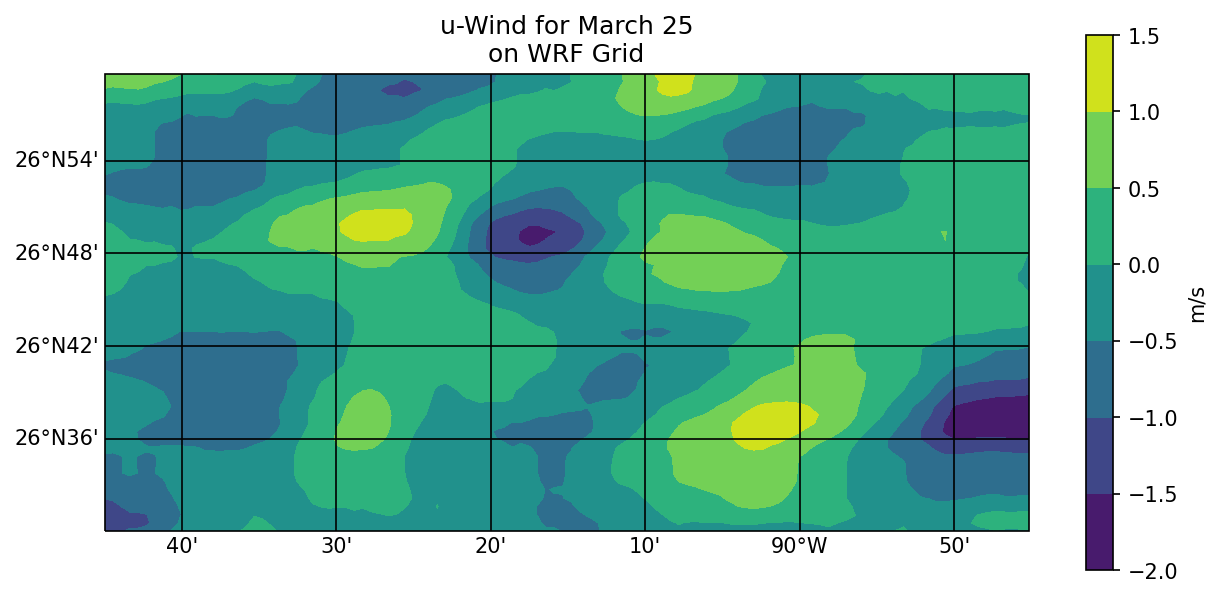

In [15]:
#U25 Winds smooth 
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, uWind25_WRF)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('u-Wind for March 25\non WRF Grid')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + '25uWind_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()

In [17]:
#Gaussian Filter U25 WIND

#REAL CASE: 
#lat_0 =  24.5
#lon_0 = -93
#lat_max = 28.75
#lon_max = -87.5

#TEST CASE mini
lat_0 =  26.5
lon_0 = -90.75
lat_max = 27
lon_max = -89.75 

#min, max, then increment and fill lat & then lon (Y=lat, X=lon)
#0.008 degrees = 1km 
WRF_lat = np.arange(lat_0, lat_max, 0.00898315)
WRF_lon = np.arange(lon_0, lon_max, 0.00898315)
WRF_latLen = len(WRF_lat)
WRF_lonLen = len(WRF_lon)

#make current arrays (u & v) that match lat & lon dimensions, fill with nans 
vWind25_WRF  = np.zeros((WRF_latLen, WRF_lonLen))  
vWind25_WRF[:] = -999

#at equator, 1deg = 111.31949077920639km, so 1km*(1deg/111.31949077920639km) = 0.00898315
#Great Circle Calculator 
#http://edwilliams.org/gccalc.htm

#DS sigma??? = 0.03 # 0.015*2   
km_per_deg= 1/0.00898315
sigma_HYCOM = 0.02 # 0.015*2 #For HYCOM 
sigma_HYCOM_km = sigma_HYCOM*km_per_deg
#sigma_DS = 0.75 #0.5-1.0 
sigma_DS = 0.75 #0.5-1.0 
sigma_DS_km = sigma_DS*km_per_deg

for y in range (0, WRF_latLen):  
    for x in range (0, WRF_lonLen):
        sum_product_vWind25HYCOM = 0
        #sum_weight_DS25vWind1 = 0
        #sum_product_vWind25DS1 = 0
        sum_weight_DS25vWind2 = 0
        sum_product_vWind25DS2 = 0
        sum_weight_DS25vWind3 = 0
        sum_product_vWind25DS3 = 0
        sum_weight_DS25vWind4 = 0
        sum_product_vWind25DS4 = 0
        sum_weight_DS25vWind5 = 0
        sum_product_vWind25DS5 = 0
        sum_weight_DS25vWind6 = 0
        sum_product_vWind25DS6 = 0
        sum_weight_DS25vWind7 = 0
        sum_product_vWind25DS7 = 0
        sum_weight_DS25vWind8 = 0
        sum_product_vWind25DS8 = 0
        sum_weight_DS25vWind9 = 0
        sum_product_vWind25DS9 = 0
        #sum_weight_DS25vWind10 = 0
        #sum_product_vWind25DS10 = 0

        #define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)
        #+- half size 
        #set bounds in lat/lon
        min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, WRF_lon[0])
        max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, WRF_lat[0])   
        max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1])     

        #DS lat/lon comparison
        #DS25vWind1_test1_In = np.where(lon25_1 >= min_lon)
        #DS25vWind1_test2_In = np.where(lon25_1 <= max_lon)
        #DS25vWind1_inter_like_lon = np.intersect1d(DS25vWind1_test1_In, DS25vWind1_test2_In)
        #DS25vWind1_test1_In = np.where(lat25_1 >= min_lat)
        #DS25vWind1_test2_In = np.where(lat25_1 <= max_lat)
        #DS25vWind1_inter_like_lat = np.intersect1d(DS25vWind1_test1_In, DS25vWind1_test2_In)         
        
        DS25vWind2_test1_In = np.where(lon25_2 >= min_lon)
        DS25vWind2_test2_In = np.where(lon25_2 <= max_lon)
        DS25vWind2_inter_like_lon = np.intersect1d(DS25vWind2_test1_In, DS25vWind2_test2_In)
        DS25vWind2_test1_In = np.where(lat25_2 >= min_lat)
        DS25vWind2_test2_In = np.where(lat25_2 <= max_lat)
        DS25vWind2_inter_like_lat = np.intersect1d(DS25vWind2_test1_In, DS25vWind2_test2_In) 
        
        DS25vWind3_test1_In = np.where(lon25_3 >= min_lon)
        DS25vWind3_test2_In = np.where(lon25_3 <= max_lon)
        DS25vWind3_inter_like_lon = np.intersect1d(DS25vWind3_test1_In, DS25vWind3_test2_In)
        DS25vWind3_test1_In = np.where(lat25_3 >= min_lat)
        DS25vWind3_test2_In = np.where(lat25_3 <= max_lat)
        DS25vWind3_inter_like_lat = np.intersect1d(DS25vWind3_test1_In, DS25vWind3_test2_In) 
        
        DS25vWind4_test1_In = np.where(lon25_4 >= min_lon)
        DS25vWind4_test2_In = np.where(lon25_4 <= max_lon)
        DS25vWind4_inter_like_lon = np.intersect1d(DS25vWind4_test1_In, DS25vWind4_test2_In)
        DS25vWind4_test1_In = np.where(lat25_4 >= min_lat)
        DS25vWind4_test2_In = np.where(lat25_4 <= max_lat)
        DS25vWind4_inter_like_lat = np.intersect1d(DS25vWind4_test1_In, DS25vWind4_test2_In)         
        
        DS25vWind5_test1_In = np.where(lon25_5 >= min_lon)
        DS25vWind5_test2_In = np.where(lon25_5 <= max_lon)
        DS25vWind5_inter_like_lon = np.intersect1d(DS25vWind5_test1_In, DS25vWind5_test2_In)
        DS25vWind5_test1_In = np.where(lat25_5 >= min_lat)
        DS25vWind5_test2_In = np.where(lat25_5 <= max_lat)
        DS25vWind5_inter_like_lat = np.intersect1d(DS25vWind5_test1_In, DS25vWind5_test2_In) 
        
        DS25vWind6_test1_In = np.where(lon25_6 >= min_lon)
        DS25vWind6_test2_In = np.where(lon25_6 <= max_lon)
        DS25vWind6_inter_like_lon = np.intersect1d(DS25vWind6_test1_In, DS25vWind6_test2_In)
        DS25vWind6_test1_In = np.where(lat25_6 >= min_lat)
        DS25vWind6_test2_In = np.where(lat25_6 <= max_lat)
        DS25vWind6_inter_like_lat = np.intersect1d(DS25vWind6_test1_In, DS25vWind6_test2_In) 

        DS25vWind7_test1_In = np.where(lon25_7 >= min_lon)
        DS25vWind7_test2_In = np.where(lon25_7 <= max_lon)
        DS25vWind7_inter_like_lon = np.intersect1d(DS25vWind7_test1_In, DS25vWind7_test2_In)
        DS25vWind7_test1_In = np.where(lat25_7 >= min_lat)
        DS25vWind7_test2_In = np.where(lat25_7 <= max_lat)
        DS25vWind7_inter_like_lat = np.intersect1d(DS25vWind7_test1_In, DS25vWind7_test2_In)
    
        DS25vWind8_test1_In = np.where(lon25_8 >= min_lon)
        DS25vWind8_test2_In = np.where(lon25_8 <= max_lon)
        DS25vWind8_inter_like_lon = np.intersect1d(DS25vWind8_test1_In, DS25vWind8_test2_In)
        DS25vWind8_test1_In = np.where(lat25_8 >= min_lat)
        DS25vWind8_test2_In = np.where(lat25_8 <= max_lat)
        DS25vWind8_inter_like_lat = np.intersect1d(DS25vWind8_test1_In, DS25vWind8_test2_In) 
        
        DS25vWind9_test1_In = np.where(lon25_9 >= min_lon)
        DS25vWind9_test2_In = np.where(lon25_9 <= max_lon)
        DS25vWind9_inter_like_lon = np.intersect1d(DS25vWind9_test1_In, DS25vWind9_test2_In)
        DS25vuWind9_test1_In = np.where(lat25_9 >= min_lat)
        DS25vWind9_test2_In = np.where(lat25_9 <= max_lat)
        DS25vWind9_inter_like_lat = np.intersect1d(DS25vWind9_test1_In, DS25vWind9_test2_In) 
        
        #DS25vWind10_test1_In = np.where(lon25_10 >= min_lon)
        #DS25vWind10_test2_In = np.where(lon25_10 <= max_lon)
        #DS25vWind10_inter_like_lon = np.intersect1d(DS25vWind10_test1_In, DS25vWind10_test2_In)
        #DS25vWind10_test1_In = np.where(lat25_10 >= min_lat)
        #DS25vWind10_test2_In = np.where(lat25_10 <= max_lat)
        #DS25vWind10_inter_like_lat = np.intersect1d(DS25vWind10_test1_In, DS25vWind10_test2_In) 

        
        #DS index
        #DS25vWind1_lon_indices =  DS25vWind1_inter_like_lon
        #DS25vWind1_lat_indices =  DS25vWind1_inter_like_lat
        DS25vWind2_lon_indices =  DS25vWind2_inter_like_lon
        DS25vWind2_lat_indices =  DS25vWind2_inter_like_lat
        DS25vWind3_lon_indices =  DS25vWind3_inter_like_lon
        DS25vWind3_lat_indices =  DS25vWind3_inter_like_lat
        DS25vWind4_lon_indices =  DS25vWind4_inter_like_lon
        DS25vWind4_lat_indices =  DS25vWind4_inter_like_lat        
        DS25vWind5_lon_indices =  DS25vWind5_inter_like_lon
        DS25vWind5_lat_indices =  DS25vWind5_inter_like_lat
        DS25vWind6_lon_indices =  DS25vWind6_inter_like_lon
        DS25vWind6_lat_indices =  DS25vWind6_inter_like_lat
        DS25vWind7_lon_indices =  DS25vWind7_inter_like_lon
        DS25vWind7_lat_indices =  DS25vWind7_inter_like_lat
        DS25vWind8_lon_indices =  DS25vWind8_inter_like_lon
        DS25vWind8_lat_indices =  DS25vWind8_inter_like_lat
        DS25vWind9_lon_indices =  DS25vWind9_inter_like_lon
        DS25vWind9_lat_indices =  DS25vWind9_inter_like_lat 
        #DS25vWind10_lon_indices =  DS25vWind10_inter_like_lon
        #DS25vWind10_lat_indices =  DS25vWind10_inter_like_lat  
        
        #Good DS index
        #DS25vWind1_good_lon = lon25_1[DS25vWind1_lon_indices]
        #DS25vWind1_good_lat = lat25_1[DS25vWind1_lat_indices] 
        DS25vWind2_good_lon = lon25_2[DS25vWind2_lon_indices]
        DS25vWind2_good_lat = lat25_2[DS25vWind2_lat_indices] 
        DS25vWind3_good_lon = lon25_3[DS25vWind3_lon_indices]
        DS25vWind3_good_lat = lat25_3[DS25vWind3_lat_indices] 
        DS25vWind4_good_lon = lon25_4[DS25vWind4_lon_indices]
        DS25vWind4_good_lat = lat25_4[DS25vWind4_lat_indices] 
        DS25vWind5_good_lon = lon25_5[DS25vWind5_lon_indices]
        DS25vWind5_good_lat = lat25_5[DS25vWind5_lat_indices] 
        DS25vWind6_good_lon = lon25_6[DS25vWind6_lon_indices]
        DS25vWind6_good_lat = lat25_6[DS25vWind6_lat_indices] 
        DS25vWind7_good_lon = lon25_7[DS25vWind7_lon_indices]
        DS25vWind7_good_lat = lat25_7[DS25vWind7_lat_indices] 
        DS25vWind8_good_lon = lon25_8[DS25vWind8_lon_indices]
        DS25vWind8_good_lat = lat25_8[DS25vWind8_lat_indices]
        DS25vWind9_good_lon = lon25_9[DS25vWind9_lon_indices]
        DS25vWind9_good_lat = lat25_9[DS25vWind9_lat_indices] 
        #DS25vWind10_good_lon = lon25_10[DS25vWind10_lon_indices]
        #DS25vWind10_good_lat = lat25_10[DS25vWind10_lat_indices]

        #DS length of food arrays 
        #DS25vWind1_good_lon_len = len(DS25vWind1_good_lon)
        #DS25vWind1_good_lat_len = len(DS25vWind1_good_lat) 
        DS25vWind2_good_lon_len = len(DS25vWind2_good_lon)
        DS25vWind2_good_lat_len = len(DS25vWind2_good_lat) 
        DS25vWind3_good_lon_len = len(DS25vWind3_good_lon)
        DS25vWind3_good_lat_len = len(DS25vWind3_good_lat) 
        DS25vWind4_good_lon_len = len(DS25vWind4_good_lon)
        DS25vWind4_good_lat_len = len(DS25vWind4_good_lat) 
        DS25vWind5_good_lon_len = len(DS25vWind5_good_lon)
        DS25vWind5_good_lat_len = len(DS25vWind5_good_lat) 
        DS25vWind6_good_lon_len = len(DS25vWind6_good_lon)
        DS25vWind6_good_lat_len = len(DS25vWind6_good_lat)  
        DS25vWind7_good_lon_len = len(DS25vWind7_good_lon)
        DS25vWind7_good_lat_len = len(DS25vWind7_good_lat) 
        DS25vWind8_good_lon_len = len(DS25vWind8_good_lon)
        DS25vWind8_good_lat_len = len(DS25vWind8_good_lat) 
        DS25vWind9_good_lon_len = len(DS25vWind9_good_lon)
        DS25vWind9_good_lat_len = len(DS25vWind9_good_lat) 
        #DS25vWind10_good_lon_len = len(DS25vWind10_good_lon)
        #DS25vWind10_good_lat_len = len(DS25vWind10_good_lat)      
                       
        #loop through values of good DS arrays 
        #for y_small_DS25vWind1 in range(0, DS25vWind1_good_lat_len):
        #    for x_small_DS25vWind1 in range(0, DS25vWind1_good_lon_len):         
        #        distance=(km_per_deg)*np.sqrt((DS25vWind1_good_lat[y_small_DS25vWind1]-WRF_lat[y])**2+((DS25vWind1_good_lon[x_small_DS25vWind1]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
        #        if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr25_1[DS25vWind1_lat_indices[y_small_DS25vWind1], DS25vWind1_lon_indices[x_small_DS25vWind1]]): 
        #            weight_DS25vWind1 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
        #            sum_weight_DS25vWind1 = sum_weight_DS25vWind1 + weight_DS25vWind1
        #            sum_product_vWind25DS1 = sum_product_vWind25DS1 + weight_DS25vWind1 * goodWindVarr25_1[DS25vWind1_lat_indices[y_small_DS25vWind1], DS25vWind1_lon_indices[x_small_DS25vWind1]]
        #        else: 
        #            weight_DS25vWind1 = 0
        
        for y_small_DS25vWind2 in range(0, DS25vWind2_good_lat_len):
            for x_small_DS25vWind2 in range(0, DS25vWind2_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25vWind2_good_lat[y_small_DS25vWind2]-WRF_lat[y])**2+((DS25vWind2_good_lon[x_small_DS25vWind2]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr25_2[DS25vWind2_lat_indices[y_small_DS25vWind2], DS25vWind2_lon_indices[x_small_DS25vWind2]]): 
                    weight_DS25vWind2 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25vWind2 = sum_weight_DS25vWind2 + weight_DS25vWind2
                    sum_product_vWind25DS2 = sum_product_vWind25DS2 + weight_DS25vWind2 * goodWindVarr25_2[DS25vWind2_lat_indices[y_small_DS25vWind2], DS25vWind2_lon_indices[x_small_DS25vWind2]]
                else: 
                    weight_DS25vWind2 = 0
        
        for y_small_DS25vWind3 in range(0, DS25vWind3_good_lat_len):
            for x_small_DS25vWind3 in range(0, DS25vWind3_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25vWind3_good_lat[y_small_DS25vWind3]-WRF_lat[y])**2+((DS25vWind3_good_lon[x_small_DS25vWind3]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr25_3[DS25vWind3_lat_indices[y_small_DS25vWind3], DS25vWind3_lon_indices[x_small_DS25vWind3]]): 
                    weight_DS25vWind3 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25vWind3 = sum_weight_DS25vWind3 + weight_DS25vWind3
                    sum_product_vWind25DS3 = sum_product_vWind25DS3 + weight_DS25vWind3 * goodWindVarr25_3[DS25vWind3_lat_indices[y_small_DS25vWind3], DS25vWind3_lon_indices[x_small_DS25vWind3]]
                else: 
                    weight_DS25vWind3 = 0 
                    
        for y_small_DS25vWind4 in range(0, DS25vWind4_good_lat_len):
            for x_small_DS25vWind4 in range(0, DS25vWind4_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25vWind4_good_lat[y_small_DS25vWind4]-WRF_lat[y])**2+((DS25vWind4_good_lon[x_small_DS25vWind4]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr25_4[DS25vWind4_lat_indices[y_small_DS25vWind4], DS25vWind4_lon_indices[x_small_DS25vWind4]]): 
                    weight_DS25vWind4 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25vWind4 = sum_weight_DS25vWind4 + weight_DS25vWind4
                    sum_product_vWind25DS4 = sum_product_vWind25DS4 + weight_DS25vWind4 * goodWindVarr25_4[DS25vWind4_lat_indices[y_small_DS25vWind4], DS25vWind4_lon_indices[x_small_DS25vWind4]]
                else: 
                    weight_DS25vWind4 = 0 
                    
        for y_small_DS25vWind5 in range(0, DS25vWind5_good_lat_len):
            for x_small_DS25vWind5 in range(0, DS25vWind5_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25vWind5_good_lat[y_small_DS25vWind5]-WRF_lat[y])**2+((DS25vWind5_good_lon[x_small_DS25vWind5]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr25_5[DS25vWind5_lat_indices[y_small_DS25vWind5], DS25vWind5_lon_indices[x_small_DS25vWind5]]): 
                    weight_DS25vWind5 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25vWind5 = sum_weight_DS25vWind5 + weight_DS25vWind5
                    sum_product_vWind25DS5 = sum_product_vWind25DS5 + weight_DS25vWind5 * goodWindVarr25_5[DS25vWind5_lat_indices[y_small_DS25vWind5], DS25vWind5_lon_indices[x_small_DS25vWind5]]
                else: 
                    weight_DS25vWind5 = 0 
                    
        for y_small_DS25vWind6 in range(0, DS25vWind6_good_lat_len):
            for x_small_DS25vWind6 in range(0, DS25vWind6_good_lon_len):          
                distance=(km_per_deg)*np.sqrt((DS25vWind6_good_lat[y_small_DS25vWind6]-WRF_lat[y])**2+((DS25vWind6_good_lon[x_small_DS25vWind6]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr25_6[DS25vWind6_lat_indices[y_small_DS25vWind6], DS25vWind6_lon_indices[x_small_DS25vWind6]]): 
                    weight_DS25vWind6 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25vWind6 = sum_weight_DS25vWind6 + weight_DS25vWind6
                    sum_product_vWind25DS6 = sum_product_vWind25DS6 + weight_DS25vWind6 * goodWindVarr25_6[DS25vWind6_lat_indices[y_small_DS25vWind6], DS25vWind6_lon_indices[x_small_DS25vWind6]]
                else: 
                    weight_DS25vWind6 = 0 
                    
        for y_small_DS25vWind7 in range(0, DS25vWind7_good_lat_len):
            for x_small_DS25vWind7 in range(0, DS25vWind7_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25vWind7_good_lat[y_small_DS25vWind7]-WRF_lat[y])**2+((DS25vWind7_good_lon[x_small_DS25vWind7]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr25_7[DS25vWind7_lat_indices[y_small_DS25vWind7], DS25vWind7_lon_indices[x_small_DS25vWind7]]): 
                    weight_DS25vWind7 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25vWind7 = sum_weight_DS25vWind7 + weight_DS25vWind7
                    sum_product_vWind25DS7 = sum_product_vWind25DS7 + weight_DS25vWind7 * goodWindVarr25_7[DS25vWind7_lat_indices[y_small_DS25vWind7], DS25vWind7_lon_indices[x_small_DS25vWind7]]
                else: 
                    weight_DS25vWind7 = 0 
                    
        for y_small_DS25vWind8 in range(0, DS25vWind8_good_lat_len):
            for x_small_DS25vWind8 in range(0, DS25vWind8_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25vWind8_good_lat[y_small_DS25vWind8]-WRF_lat[y])**2+((DS25vWind8_good_lon[x_small_DS25vWind8]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr25_8[DS25vWind8_lat_indices[y_small_DS25vWind8], DS25vWind8_lon_indices[x_small_DS25vWind8]]): 
                    weight_DS25vWind8 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25vWind8 = sum_weight_DS25vWind8 + weight_DS25vWind8
                    sum_product_vWind25DS8 = sum_product_vWind25DS8 + weight_DS25vWind8 * goodWindVarr25_8[DS25vWind8_lat_indices[y_small_DS25vWind8], DS25vWind8_lon_indices[x_small_DS25vWind8]]
                else: 
                    weight_DS25vWind8 = 0 
                    
        for y_small_DS25vWind9 in range(0, DS25vWind9_good_lat_len):
            for x_small_DS25vWind9 in range(0, DS25vWind9_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25vWind9_good_lat[y_small_DS25vWind9]-WRF_lat[y])**2+((DS25vWind9_good_lon[x_small_DS25vWind9]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr25_9[DS25vWind9_lat_indices[y_small_DS25vWind9], DS25vWind9_lon_indices[x_small_DS25vWind9]]): 
                    weight_DS25vWind9 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25vWind9 = sum_weight_DS25vWind9 + weight_DS25vWind9
                    sum_product_vWind25DS9 = sum_product_vWind25DS9 + weight_DS25vWind9 * goodWindVarr25_9[DS25vWind9_lat_indices[y_small_DS25vWind9], DS25vWind9_lon_indices[x_small_DS25vWind9]]
                else: 
                    weight_DS25vWind9 = 0 
                    
        #for y_small_DS25vWind10 in range(0, DS25vWind10_good_lat_len):
        #    for x_small_DS25vWind10 in range(0, DS25vWind10_good_lon_len):         
        #        distance=(km_per_deg)*np.sqrt((DS25vWind10_good_lat[y_small_DS25vWind10]-WRF_lat[y])**2+((DS25vWind10_good_lon[x_small_DS25vWind10]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
         #       if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr25_10[DS25vWind10_lat_indices[y_small_DS25vWind10], DS25vWind10_lon_indices[x_small_DS25vWind10]]): 
         #           weight_DS25vWind10 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
         #           sum_weight_DS25vWind10 = sum_weight_DS25vWind10 + weight_DS25vWind10
         #           sum_product_vWind25DS10 = sum_product_vWind25DS10 + weight_DS25vWind10 * goodWindVarr25_10[DS25vWind10_lat_indices[y_small_DS25vWind10], DS25vWind10_lon_indices[x_small_DS25vWind10]]
         #       else: 
         #           weight_DS25vWind10 = 0 
                    
    #outside of loop: sum of products/sum of weights
        vWind25_WRF[y,x] = (sum_product_vWind25DS2 + sum_product_vWind25DS3 + sum_product_vWind25DS4 + sum_product_vWind25DS5 + sum_product_vWind25DS6 + sum_product_vWind25DS7 + sum_product_vWind25DS8 + sum_product_vWind25DS9 )/(sum_weight_DS25vWind2 + sum_weight_DS25vWind2 + sum_weight_DS25vWind3 + sum_weight_DS25vWind4 + sum_weight_DS25vWind5 + sum_weight_DS25vWind6 + sum_weight_DS25vWind7 + sum_weight_DS25vWind8 + sum_weight_DS25vWind9 ) #add each DS sum, add ech sum weigth 
    

In [18]:
print(vWind25_WRF.shape)
print(vWind25_WRF)

(56, 112)
[[ 1.19948783e+00  1.20192965e+00  1.14446084e+00 ...  2.97181496e-01
   2.87470395e-01  2.39584373e-01]
 [ 8.18156322e-01  8.09942371e-01  7.74459811e-01 ...  3.74189820e-01
   3.63348138e-01  2.87371524e-01]
 [ 4.15095046e-01  3.96451927e-01  3.90860734e-01 ...  5.69158515e-01
   5.75221945e-01  5.28643648e-01]
 ...
 [ 1.21357212e+00  1.10301205e+00  9.93095909e-01 ... -4.73249584e-02
  -7.28346295e-02 -5.20878432e-02]
 [ 1.24451239e+00  1.12866073e+00  1.02817595e+00 ... -1.47563103e-02
  -3.62558519e-02  1.54752371e-03]
 [ 1.24756277e+00  1.13809604e+00  1.04168171e+00 ...  3.37859229e-02
   8.37331668e-04  4.85904406e-02]]


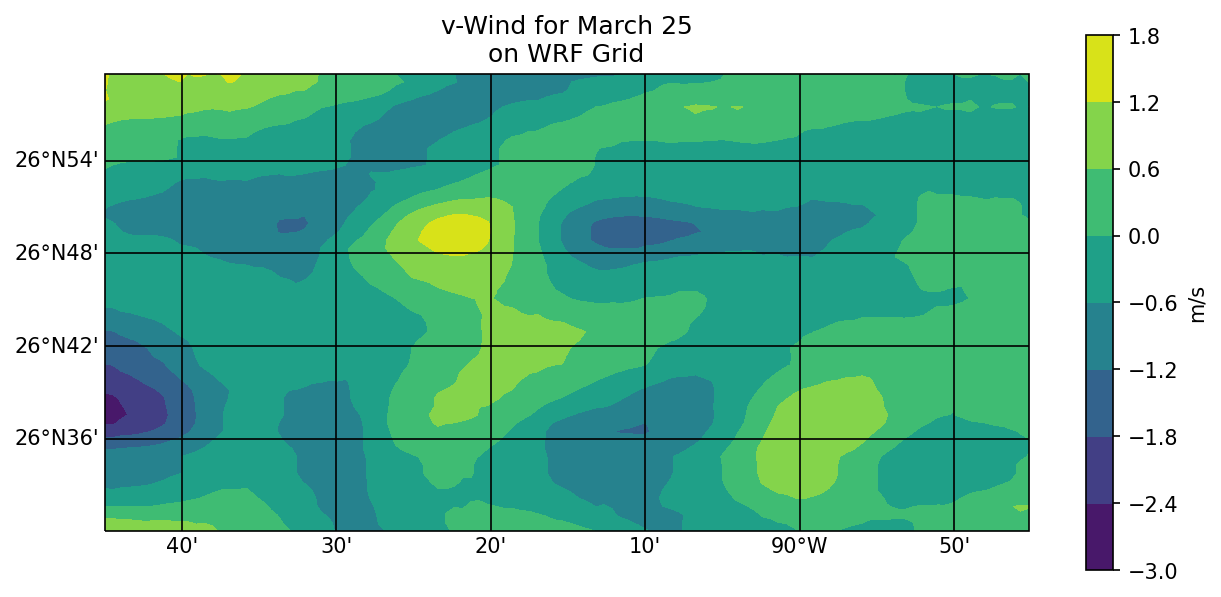

In [19]:
#U25 Winds smooth 
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, vWind25_WRF)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('v-Wind for March 25\non WRF Grid')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + '25vWind_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()